In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%qtconsole

# notes:
maybe I should fix regularization at 1

In [2]:
%cd /Users/cgu3/Documents/lsc-gnn
%pwd

/Users/cgu3/Documents/lsc-gnn


/Users/cgu3/Documents/lsc-gnn/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/lsc-gnn'

In [13]:
df = pd.read_json('results/results_LSC.json', lines=True)
# df = pd.read_json('results/final_cora_results.json', lines=True)
# df = pd.read_json('results/final_citeseer_results.json', lines=True)

df['target_ratio'] = round(df['target_ratio'], 2)
df['perturb_rate'] = round(df['perturb_rate'], 2)

In [14]:
df

,dataset,target_ratio,use_edge_for_predict,layer_type,seed,val_loss,accuracy,learning_rate,regularization,neg_sample_ratio,perturb_rate,num_epochs,execution_time,time_stamp
0,Cora,0.5,full,GATConv,1,1.5623,0.7926,0.005,0,1,0.0,1000,11.66,2025-02-21 16:33:25
1,Cora,0.5,full,GATConv,1,1.2811,0.7815,0.005,1,1,0.0,1000,9.09,2025-02-21 16:33:36
2,Cora,0.5,full,GATConv,1,1.1433,0.8037,0.005,2,1,0.0,1000,9.05,2025-02-21 16:33:47
3,Cora,0.5,full,GATConv,1,1.0938,0.7926,0.005,3,1,0.0,1000,8.96,2025-02-21 16:33:58
4,Cora,0.5,full,GATConv,1,1.1375,0.7926,0.005,4,1,0.0,1000,8.99,2025-02-21 16:34:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,PubMed,0.9,full,GATConv,20,1.4636,0.7737,0.005,6,1,0.3,1000,10.52,2025-02-23 00:27:51
9236,PubMed,0.9,full,GATConv,20,1.3001,0.7684,0.005,7,1,0.3,1000,10.48,2025-02-23 00:28:04
9237,PubMed,0.9,full,GATConv,20,1.3978,0.7675,0.005,8,1,0.3,1000,10.68,2025-02-23 00:28:18
9238,PubMed,0.9,full,GATConv,20,1.3732,0.7715,0.005,9,1,0.3,1000,10.54,2025-02-23 00:28:32


In [15]:
# calculate mean and std for accuracy group by dataset and target_ratio
df_first = df[df['regularization'] == 0].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_first = (100 * df_first).round(2)
# flatten the columns
df_first.columns = ['_'.join(col).strip('_') for col in df_first.columns.values]
# create a new column with the name 'GAT_full" using in format of string accuracy_mean +- accuracy_std
df_first['GAT_full'] = df_first['accuracy_mean'].round(2).astype(str) + "±" + df_first['accuracy_std'].round(2).astype(str)
df_first = df_first[['GAT_full']]

In [16]:
# df_best = df.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate']).apply(lambda x: x.loc[x['val_loss'].idxmin()])[['accuracy', 'regularization']]
# df_best = df_best.reset_index()
# # get average of seed group by dataset, target_ratio and perturb_rate
# df_best = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'regularization':['mean', 'std']})
# df_best

In [17]:
df_best = df.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate']).apply(lambda x: x.loc[x['val_loss'].idxmin()])[['accuracy', 'regularization']]
# calculate mean and std for accuracy group by dataset and target_ratio
df_best = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_best = (100 * df_best).round(2)
# flatten the columns
df_best.columns = ['_'.join(col).strip('_') for col in df_best.columns.values]
# create a new column with the name "LSC-GNN" using in format of string accuracy_mean +- accuracy_std
df_best['LSC-GNN'] = df_best['accuracy_mean'].round(2).astype(str) + "±" + df_best['accuracy_std'].round(2).astype(str)
# df_best.rename(columns={'accuracy_mean': 'With regularizaion'}, inplace=True)
df_best = df_best[['LSC-GNN']]
df_best

/var/folders/xs/_jggb8_n03q3bxbybznls2w1q5_5xx/T/ipykernel_41560/906254370.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_best = df.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate']).apply(lambda x: x.loc[x['val_loss'].idxmin()])[['accuracy', 'regularization']]


LSC-GNN
dataset  target_ratio perturb_rate            
CiteSeer 0.5          0.00          70.03±1.07
                      0.05            71.2±1.5
                      0.10          70.09±1.03
                      0.15          69.19±1.21
                      0.20          69.97±1.16
...                                        ...
PubMed   0.9          0.10          82.45±1.18
                      0.15          80.21±1.17
                      0.20           79.5±0.95
                      0.25          78.02±2.54
                      0.30          76.55±1.93

[63 rows x 1 columns]

In [18]:
# combine df_first and df_best horizontally
df_combined = pd.concat([df_first, df_best], axis=1)
df_combined = df_combined.reset_index()
# convert to long format
df_combined = df_combined.melt(id_vars=['dataset', 'target_ratio', 'perturb_rate'], var_name='model', value_name='accuracy')
df_combined

,dataset,target_ratio,perturb_rate,model,accuracy
0,CiteSeer,0.5,0.00,GAT_full,68.19±1.74
1,CiteSeer,0.5,0.05,GAT_full,67.02±1.21
2,CiteSeer,0.5,0.10,GAT_full,66.12±1.06
3,CiteSeer,0.5,0.15,GAT_full,62.71±2.4
4,CiteSeer,0.5,0.20,GAT_full,64.85±2.08
...,...,...,...,...,...
121,PubMed,0.9,0.10,LSC-GNN,82.45±1.18
122,PubMed,0.9,0.15,LSC-GNN,80.21±1.17
123,PubMed,0.9,0.20,LSC-GNN,79.5±0.95
124,PubMed,0.9,0.25,LSC-GNN,78.02±2.54


In [19]:

# Load your dataframe (assuming it's already loaded as df)
df = df_combined.reset_index()
# Pivot the table to match the requested format
df_transformed = df.pivot(index=["target_ratio", "dataset", "model"], columns="perturb_rate", values=["accuracy"])

# Flatten column names for readability
df_transformed.columns = [f"{round(col[1], 2)}" for col in df_transformed.columns]

# Reset index for display
# df_transformed.reset_index(inplace=True)

# Display transformed dataframe
df_transformed


0.0        0.05         0.1  \
target_ratio dataset  model                                          
0.5          CiteSeer GAT_full  68.19±1.74  67.02±1.21  66.12±1.06   
                      LSC-GNN   70.03±1.07    71.2±1.5  70.09±1.03   
             Cora     GAT_full  79.41±1.38  78.96±1.67  73.81±1.57   
                      LSC-GNN    78.0±1.47  77.85±1.38  77.19±1.05   
             PubMed   GAT_full  83.69±0.95   82.0±0.62   80.6±0.95   
                      LSC-GNN   85.86±0.98  83.75±1.94  82.09±4.46   
0.7          CiteSeer GAT_full  71.01±1.23  66.56±1.21   65.2±1.34   
                      LSC-GNN   74.19±1.07  69.87±1.46  70.19±1.42   
             Cora     GAT_full  82.64±1.02  80.21±1.28   77.7±1.65   
                      LSC-GNN   81.03±2.19  82.72±1.24  79.87±1.66   
             PubMed   GAT_full   83.47±0.7   82.91±0.9  81.43±1.14   
                      LSC-GNN   85.39±1.34  84.96±0.63  83.47±0.92   
0.9          CiteSeer GAT_full   71.86±0.7  68.21±0.74  64.38±1.03   
                      LSC-GNN   73.84±1.05  73.72±1.35  70.07±1.04   
             Cora     GAT_full  87.21±0.82  80.35±0.66  76.98±1.45   
                      LSC-GNN   85.73±1.74  83.41±1.31  76.98±3.99   
             PubMed   GAT_full  85.11±0.44  82.17±0.67   81.3±1.15   
                      LSC-GNN   86.76±0.47  83.73±0.95  82.45±1.18   

                                      0.15         0.2        0.25         0.3  
target_ratio dataset  model                                                     
0.5          CiteSeer GAT_full   62.71±2.4  64.85±2.08   60.0±1.52   58.04±1.9  
                      LSC-GNN   69.19±1.21  69.97±1.16  65.21±2.08  64.31±1.34  
             Cora     GAT_full  77.85±1.62  76.48±1.66  71.85±2.78  76.04±1.81  
                      LSC-GNN   82.96±1.32  79.41±2.07  76.63±1.28  80.44±1.38  
             PubMed   GAT_full  80.22±0.89  78.81±0.94  78.92±0.61  78.21±1.52  
                      LSC-GNN   82.31±1.55  81.16±0.97  80.55±2.71  78.07±7.43  
0.7          CiteSeer GAT_full  65.76±0.61  63.08±1.91  59.83±1.25    57.7±2.0  
                      LSC-GNN   68.15±1.78  68.11±1.27   67.2±1.59  65.16±2.43  
             Cora     GAT_full  75.96±2.44  75.96±1.69  71.72±1.53  69.63±3.21  
                      LSC-GNN   79.21±2.18   81.24±2.0  76.41±1.35  75.33±1.13  
             PubMed   GAT_full  80.08±1.43  79.11±1.14  78.82±1.76  78.26±0.95  
                      LSC-GNN   81.51±1.94   80.67±1.6  78.47±3.66  79.13±1.46  
0.9          CiteSeer GAT_full  64.07±1.51  61.82±1.25  58.63±1.99  56.91±1.44  
                      LSC-GNN    71.6±1.35   68.6±1.46   68.2±1.71  65.84±1.56  
             Cora     GAT_full  77.14±2.91  71.11±2.44  72.06±2.08  71.36±2.95  
                      LSC-GNN   80.96±1.28  77.13±1.53  76.41±2.46  75.71±4.09  
             PubMed   GAT_full  79.48±1.22  79.72±1.14  78.84±1.74   76.51±2.2  
                      LSC-GNN   80.21±1.17   79.5±0.95  78.02±2.54  76.55±1.93

In [21]:
latex_table = df_transformed.to_latex()
print(latex_table)

\begin{tabular}{llllllllll}
\toprule
 &  &  & 0.0 & 0.05 & 0.1 & 0.15 & 0.2 & 0.25 & 0.3 \\
target_ratio & dataset & model &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{6}{*}{0.500000} & \multirow[t]{2}{*}{CiteSeer} & GAT_full & 68.19±1.74 & 67.02±1.21 & 66.12±1.06 & 62.71±2.4 & 64.85±2.08 & 60.0±1.52 & 58.04±1.9 \\
 &  & LSC-GNN & 70.03±1.07 & 71.2±1.5 & 70.09±1.03 & 69.19±1.21 & 69.97±1.16 & 65.21±2.08 & 64.31±1.34 \\
\cline{2-10}
 & \multirow[t]{2}{*}{Cora} & GAT_full & 79.41±1.38 & 78.96±1.67 & 73.81±1.57 & 77.85±1.62 & 76.48±1.66 & 71.85±2.78 & 76.04±1.81 \\
 &  & LSC-GNN & 78.0±1.47 & 77.85±1.38 & 77.19±1.05 & 82.96±1.32 & 79.41±2.07 & 76.63±1.28 & 80.44±1.38 \\
\cline{2-10}
 & \multirow[t]{2}{*}{PubMed} & GAT_full & 83.69±0.95 & 82.0±0.62 & 80.6±0.95 & 80.22±0.89 & 78.81±0.94 & 78.92±0.61 & 78.21±1.52 \\
 &  & LSC-GNN & 85.86±0.98 & 83.75±1.94 & 82.09±4.46 & 82.31±1.55 & 81.16±0.97 & 80.55±2.71 & 78.07±7.43 \\
\cline{1-10} \cline{2-10}
\multirow[t]{6}{*}{0.700000} & \multirow[t]

In [138]:
df_GAT = pd.read_json('results/results_GAT.json', lines=True)
df_GAT['target_ratio'] = round(df_GAT['target_ratio'], 2)
df_GAT['perturb_rate'] = round(df_GAT['perturb_rate'], 2)

KeyError: 'use_edge_for_prediction'

In [43]:
# calculate mean and std for accuracy group by dataset and target_ratio and use_edge_for_prediction
df_GAT_agg = df_GAT[df_GAT['use_edge_for_predict'] == 'target'].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_GAT_agg = (100 * df_GAT_agg).round(2)
# flatten the columns
df_GAT_agg.columns = ['_'.join(col).strip('_') for col in df_GAT_agg.columns.values]
df_GAT_agg['GAT_target'] = df_GAT_agg['accuracy_mean'].round(2).astype(str) + "±" + df_GAT_agg['accuracy_std'].round(2).astype(str)
df_GAT_agg_target = df_GAT_agg[['GAT_target']]
df_GAT_agg_target

GAT_target
dataset  split_ratio false_pos_edge_ratio            
CiteSeer 0.5         0.00                  67.02±1.72
                     0.05                  63.58±1.65
                     0.10                  61.93±0.84
                     0.15                  63.43±1.81
                     0.20                   59.1±1.55
...                                               ...
PubMed   0.9         0.10                  80.84±0.89
                     0.15                  79.44±0.79
                     0.20                  78.48±0.83
                     0.25                  78.35±0.71
                     0.30                  76.18±1.68

[63 rows x 1 columns]

In [45]:
# calculate mean and std for accuracy group by dataset and target_ratio and use_edge_for_prediction
df_GAT_agg = df_GAT[df_GAT['use_edge_for_predict'] == 'regularization'].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_GAT_agg = (100 * df_GAT_agg).round(2)
# flatten the columns
df_GAT_agg.columns = ['_'.join(col).strip('_') for col in df_GAT_agg.columns.values]
df_GAT_agg['GAT_regularization'] = df_GAT_agg['accuracy_mean'].round(2).astype(str) + "±" + df_GAT_agg['accuracy_std'].round(2).astype(str)
df_GAT_agg_regularization = df_GAT_agg[['GAT_regularization']]
df_GAT_agg_regularization

GAT_regularization
dataset  split_ratio false_pos_edge_ratio                   
CiteSeer 0.5         0.00                          63.8±2.39
                     0.05                         66.96±3.05
                     0.10                         65.15±2.91
                     0.15                         66.39±1.46
                     0.20                         65.99±1.73
...                                                      ...
PubMed   0.9         0.10                         83.67±0.64
                     0.15                         83.84±0.65
                     0.20                         82.04±0.45
                     0.25                         83.38±0.42
                     0.30                         82.61±0.59

[63 rows x 1 columns]

In [86]:
df_other = pd.read_json('results/results_other.json', lines=True)
df_other['target_ratio'] = round(df_other['target_ratio'], 2)
df_other['perturb_rate'] = round(df_other['perturb_rate'], 2)

In [103]:
df_GCN_agg = df_other[(df_other['layer_type'] == 'GCNConv') & (df_other['use_edge_for_predict'] == 'full')].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
df_GCN_agg = (100 * df_GCN_agg).round(2)
# flatten the columns
df_GCN_agg.columns = ['_'.join(col).strip('_') for col in df_GCN_agg.columns.values]
df_GCN_agg['GCN_full'] = df_GCN_agg['accuracy_mean'].round(2).astype(str) + "±" + df_GCN_agg['accuracy_std'].round(2).astype(str)
df_GCN_agg_full = df_GCN_agg[['GCN_full']]
df_GCN_agg_full

GCN_full
dataset  split_ratio false_pos_edge_ratio            
CiteSeer 0.5         0.00                  69.13±0.74
                     0.05                  69.43±1.35
                     0.10                   66.9±1.08
                     0.15                  69.52±1.16
                     0.20                   67.2±1.15
...                                               ...
PubMed   0.9         0.10                  81.53±0.53
                     0.15                   81.2±0.57
                     0.20                   80.25±0.5
                     0.25                  79.27±0.39
                     0.30                  77.51±0.53

[63 rows x 1 columns]

# plot AUC for each dataset and each split_ratio, with regularization in x-axis



In [136]:
df_current = df[(df['seed'] == 43) & (df['target_ratio'] == split_ratio) & (df['perturb_rate'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
df_current

KeyError: 'seed'

ValueError: x and y must have same first dimension, but have shapes (6,) and (0,)

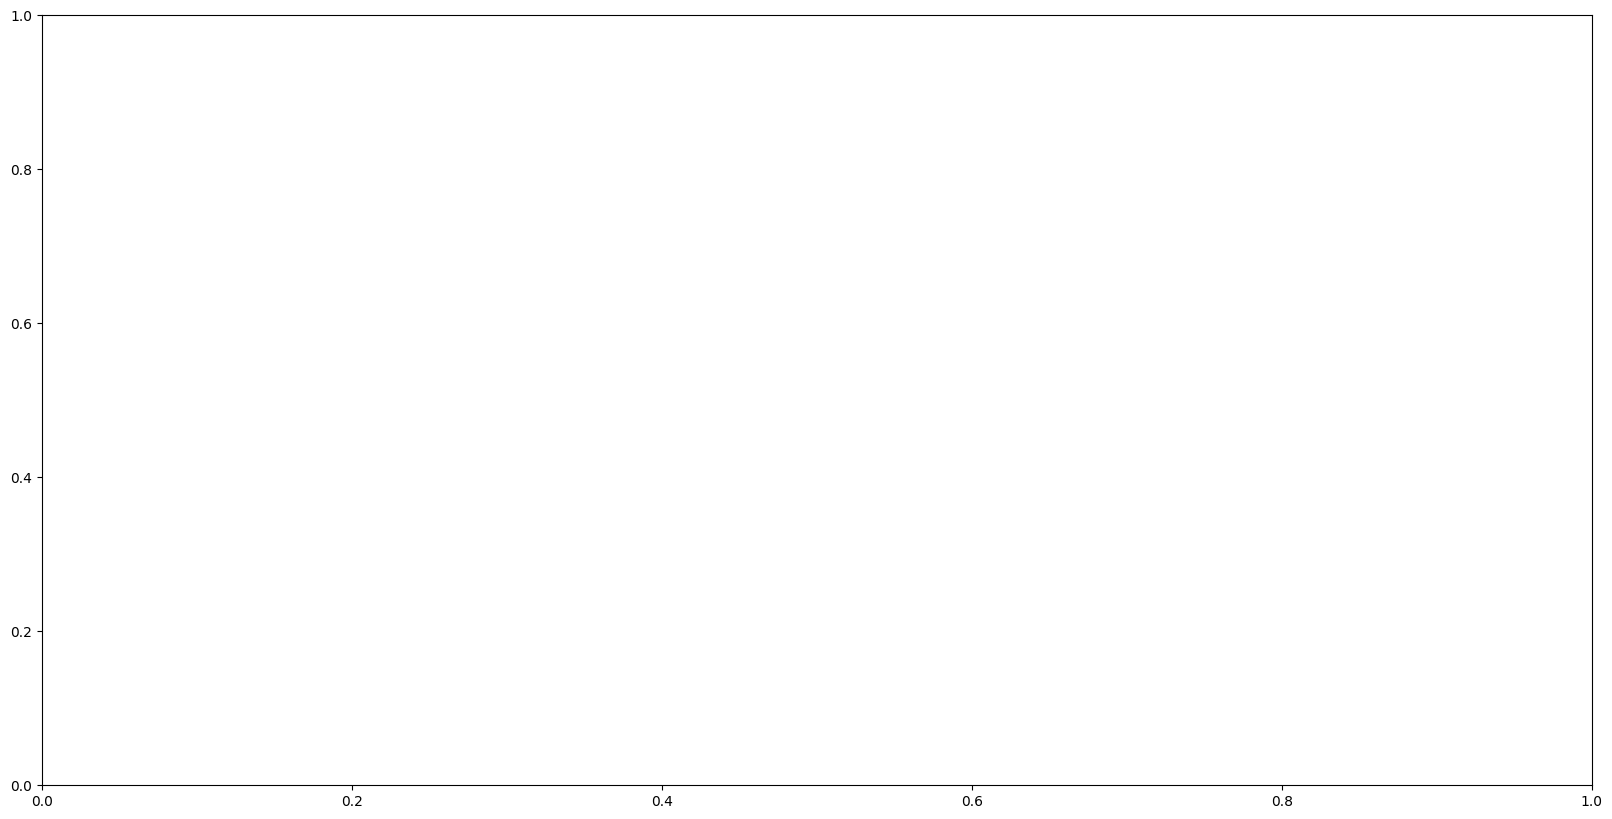

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))

# Get unique seeds
dataset = 'Cora'
split_ratio = 0.33
false_pos_edge_ratio = 0.25
seeds = df['seed'].unique()

# plot AUC
for seed in seeds:
    df_current = df[(df['seed'] == seed) & (df['target_ratio'] == split_ratio) & (df['perturb_rate'] == false_pos_edge_ratio) & (df['add_input_edges_to_output'] == False)]
    ax.plot([0, 1, 2, 3, 4, 5], df_current['AUC'],
               label=f'dataset={dataset}, split={split_ratio}, false_pos_edge={false_pos_edge_ratio}, seed={seed}')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax.set_xlabel('Regularization')
ax.set_title('AUC')
ax.legend()

In [19]:
df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,val_best_loss_mean,val_best_loss_std,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean


In [21]:
 df_agg

,dataset,split_ratio,false_pos_edge_ratio,add_input_edges_to_output,regularization,val_best_loss_mean,val_best_loss_std,AUC_mean,AUC_std,AP_mean,AP_std,execution_time_mean,execution_time_std,best_epochs_mean
0,Cora,0.7,0.05,False,0,0.5377,NaN,0.8400,NaN,0.8569,NaN,12.48,NaN,996.0
1,Cora,0.7,0.05,False,10,0.5373,NaN,0.8408,NaN,0.8569,NaN,13.26,NaN,996.0
2,Cora,0.7,0.05,False,100,0.5343,NaN,0.8471,NaN,0.8604,NaN,12.95,NaN,996.0
3,Cora,0.7,0.05,False,1000,0.5317,NaN,0.8660,NaN,0.8785,NaN,12.51,NaN,924.0
4,Cora,0.7,0.05,False,1500,0.5279,NaN,0.8653,NaN,0.8778,NaN,12.63,NaN,996.0
5,Cora,0.7,0.05,False,2000,0.5304,NaN,0.8645,NaN,0.8763,NaN,12.58,NaN,985.0
6,Cora,0.7,0.10,False,0,0.5581,NaN,0.8310,NaN,0.8606,NaN,12.52,NaN,842.0
7,Cora,0.7,0.10,False,10,0.5557,NaN,0.8336,NaN,0.8623,NaN,13.39,NaN,701.0
8,Cora,0.7,0.10,False,100,0.5577,NaN,0.8333,NaN,0.8592,NaN,12.66,NaN,450.0
9,Cora,0.7,0.10,False,1000,0.5517,NaN,0.8359,NaN,0.8552,NaN,13.54,NaN,997.0


ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

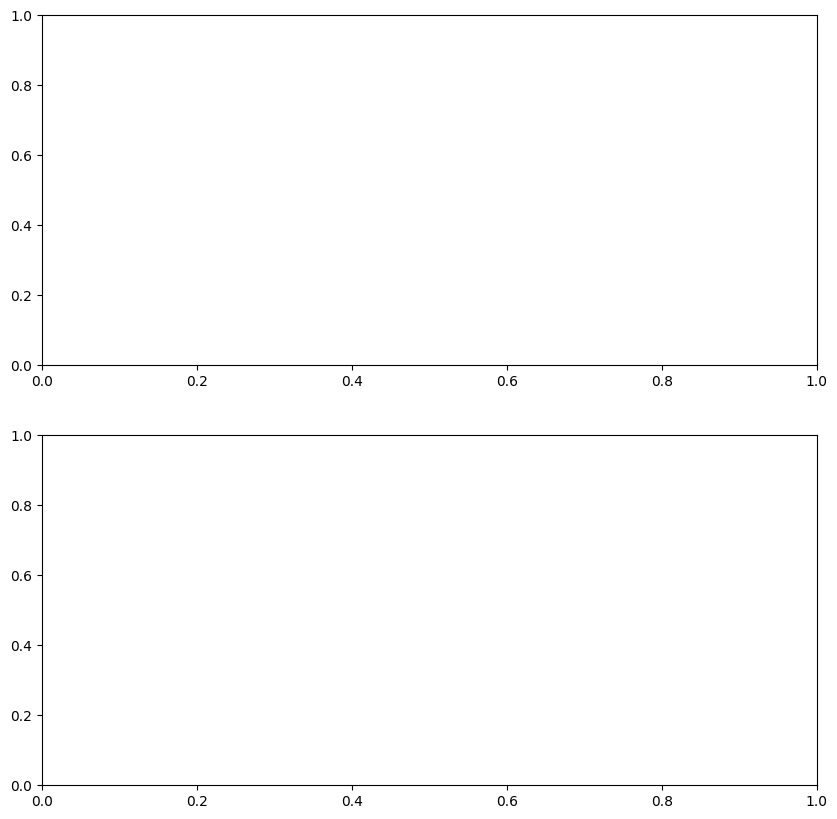

In [22]:
# plot for validation loss

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define a list of markers
markers = ['o', 's', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Create a color map
colors = list(mcolors.TABLEAU_COLORS.keys())
split_ratios = df_agg['target_ratio'].unique()
color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}

# Create a marker map
false_pos_edge_ratios = df_agg['perturb_rate'].unique()
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]
        # plot AUC
        ax[0].plot([0, 1, 2, 3, 4, 5], df_current['val_best_loss_mean'],
                   label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        # add error bar
        ax[0].set_xticks([0, 1, 2, 3, 4, 5])
        ax[0].grid(axis='y')
        ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[0].set_xlabel('Regularization')
        ax[0].set_title('AUC')

# Create a custom legend
from matplotlib.lines import Line2D
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
ax[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# save above plot as a figure
fig.savefig('figures/pubmed_auc_ap.png', bbox_inches='tight', dpi=300)

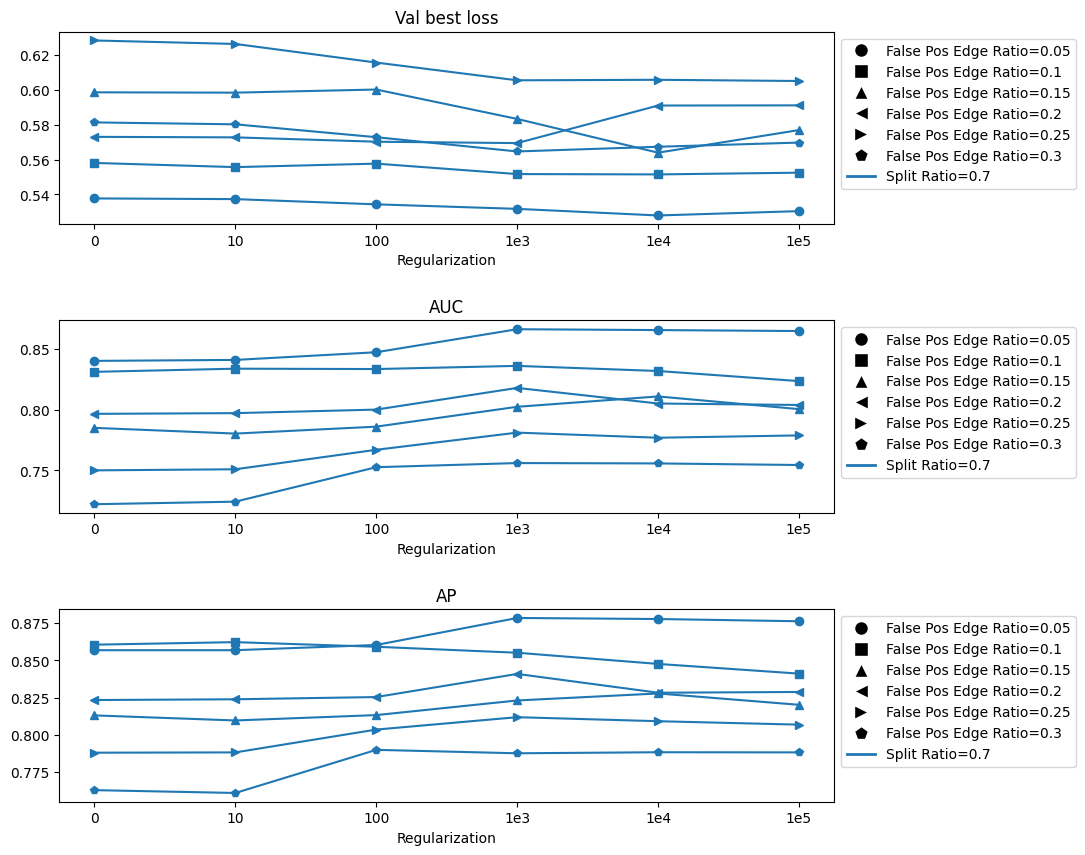

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Define markers and colors
markers = ['o', 's', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
colors = list(mcolors.TABLEAU_COLORS.keys())

split_ratios = df_agg['target_ratio'].unique()
false_pos_edge_ratios = df_agg['perturb_rate'].unique()

color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# Plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

        for i, metric in enumerate(['val_best_loss_mean', 'AUC_mean', 'AP_mean']):
            ax[i].plot([0, 1, 2, 3, 4, 5], df_current[metric],
                       label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                       marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
            ax[i].set_xticks([0, 1, 2, 3, 4, 5])
            ax[i].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
            ax[i].set_xlabel('Regularization')
            ax[i].grid(axis='y')

        ax[0].set_title('Val best loss')
        ax[1].set_title('AUC')
        ax[2].set_title('AP')

# Adjust space between plots
plt.subplots_adjust(hspace=0.5)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
for a in ax:
    a.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as a figure
fig.savefig('figures/pubmed_auc_ap.png', bbox_inches='tight', dpi=300)

In [172]:

df_agg_current = df_agg[(df_agg['dataset'] == dataset) & (df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

# plot AUC
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AUC']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['AUC']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['AUC']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('AUC')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

TypeError: 'Axes' object is not subscriptable

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')